# THE SPAKS FOUNDATION

# HARSH GUPTA

Graduate Rotational Internship Program

Task 1 : Prediction Using Supervised Machine Learning

AIM : Predict the percentage of a student based on the no. of study hours

This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data.



In [3]:
#importing all the requires libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(8)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Checking for the type of values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values so no requirement for data cleaning.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot between parameters: Hours of study and Scores obtained.

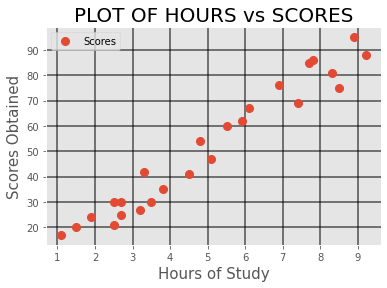

In [8]:
#Plotting the distribution of scores

style.use('ggplot')
data.plot(x='Hours',y='Scores',style='o',markersize=8)
plt.title("PLOT OF HOURS vs SCORES",fontsize=20)
plt.xlabel("Hours of Study",fontsize=15)
plt.ylabel("Scores Obtained",fontsize=15)
plt.legend(loc=2)
plt.grid(color='k',linewidth='2',linestyle='-',alpha=0.5)
plt.show()

[]

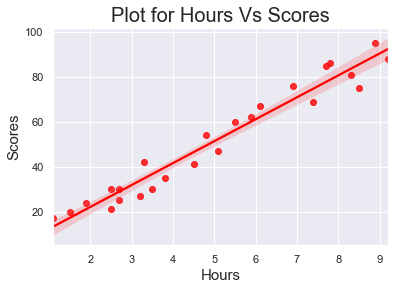

In [9]:
#Plotting line plot to desribe the relationship between feature and target.

sns.set(style='darkgrid')
sns.regplot(x=data['Hours'],y=data['Scores'],data=data,color='red')
plt.title('Plot for Hours Vs Scores',fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.plot()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
x=data.iloc[: ,:-1]
y=data.iloc[: ,1]

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [14]:
#prediction of the regression line

print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.91065648]
Intercept -  2.018160041434683


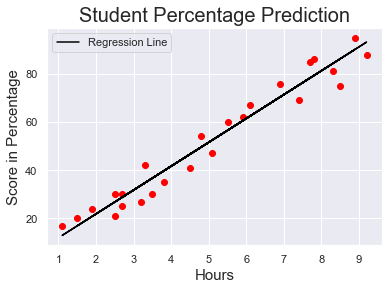

In [15]:
# Plotting the regression line

line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data

plt.title("Student Percentage Prediction",fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Score in Percentage",fontsize=15)
plt.scatter(x, y,color='red')
plt.plot(x, line,color='black',label="Regression Line")
plt.legend()
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
y_pred = regressor.predict(x_test) # Predicting the scores
x_test # Testing data - In Hours

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [17]:
#Comparing actual vs predicted

df=pd.DataFrame({'Actual':y_test,'Prdicted':y_pred})
df

,Actual,Prdicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [18]:
#Estimating training and test score

print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


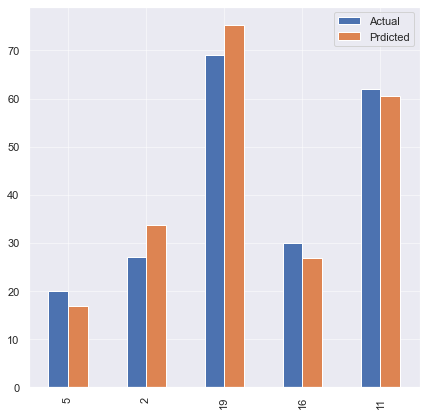

In [19]:
#plotting the grid to depict the actual and predicted value

df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.show()

What will be predicted score if a student study for 9.25 hrs in a day?

In [20]:
#Predicting Scores if a Student Studies for 9.25 hrs/day.

hours=9.25
own_pred=regressor.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating The Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
